In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('UpdatedResumeDataSet.csv')

In [3]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
df.shape

(962, 2)

In [5]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

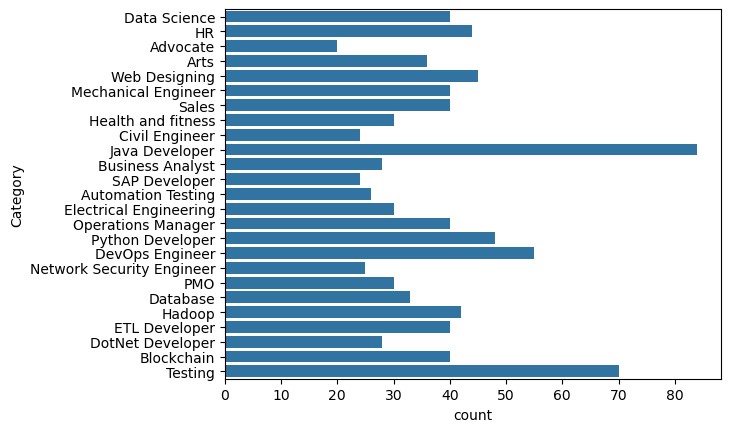

In [6]:
plt.figure()
sns.countplot(df['Category'])
plt.show()

In [7]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()

In [8]:
df['Category'][0]

'Data Science'

In [9]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

## Cleaning the Resume Data

In [10]:
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def cleanResume(txt):
    cleantxt = re.sub('https\S+', '', txt)
    cleantxt = re.sub(r'@\S+|#\S+', '', cleantxt)
    cleantxt = re.sub(r'[^\w\s]', '', cleantxt)
    
    tokens = word_tokenize(cleantxt)
    
    cleantxt = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.lower() not in stop_words]
    
    return ' '.join(cleantxt)

In [11]:
cleanResume('This is sample sentence https://google.com @gmail.com harleen activities')

'sample sentence harleen activity'

In [12]:
df['Resume']=df['Resume'].apply(lambda x: cleanResume(x))

In [13]:
df['Resume'][3]

'skill â r â python â sap hana â tableau â sap hana sql â sap hana pal â m sql â sap lumira â c â linear programming â data modelling â advance analytics â scm analytics â retail analytics âsocial medium analytics â nlp education detail january 2017 january 2018 pgdm business analytics great lake institute management illinois institute technology january 2013 bachelor engineering electronics communication bengaluru karnataka new horizon college engineering bangalore visvesvaraya technological university data science consultant consultant deloitte usi skill detail linear programming exprience 6 month retail exprience 6 month retail marketing exprience 6 month scm exprience 6 month sql exprience le 1 year month deep learning exprience le 1 year month machine learning exprience le 1 year month python exprience le 1 year month r exprience le 1 year monthscompany detail company deloitte usi description project involved analysing historic deal coming insight optimize future deal role given r

In [14]:
from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()
df['Category']= label_encoder.fit_transform(df['Category'])

In [15]:
df['Category']

0       6
1       6
2       6
3       6
4       6
       ..
957    23
958    23
959    23
960    23
961    23
Name: Category, Length: 962, dtype: int64

## Feature Extraction

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
requiredText  = tfidf.transform(df['Resume'])

In [17]:
df

,Category,Resume
0,6,skill programming language python panda numpy ...
1,6,education detail may 2013 may 2017 uitrgpv dat...
2,6,area interest deep learning control system des...
3,6,skill â r â python â sap hana â tableau â sap ...
4,6,education detail mca ymcaust faridabad haryana...
...,...,...
957,23,computer skill â proficient m office word basi...
958,23,â willingness accept challenge â positive thin...
959,23,personal skill â quick learner â eagerness lea...
960,23,computer skill software knowledge mspower poin...


In [18]:
requiredText

<962x7152 sparse matrix of type '<class 'numpy.float64'>'
	with 156125 stored elements in Compressed Sparse Row format>

In [19]:
x=requiredText
y=df['Category']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)

In [22]:
print(x_train.shape, x_test.shape)

(769, 7152) (193, 7152)


## Training the Model

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression 

model_params = [
    {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [64, 100, 128],
            'max_features': ['sqrt', 'log2'],
            'criterion': ['gini', 'entropy']
        }
    },
    {
        'model': AdaBoostClassifier(algorithm='SAMME'),
        'params': {
            'n_estimators': [50, 100, 150],
            'learning_rate': [0.5, 1.0, 1.5]
        }
    },
    {
        'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [100, 150],
            'learning_rate': [0.1, 0.2, 0.3],
            'max_depth': [3, 5, 7]
        }
    },
    {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf', 'poly'],
            'gamma': ['scale', 'auto']
        }
    },
    {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }
    },
    {
        'model': MultinomialNB(),
        'params': {
            'alpha': [0.5, 1.0, 1.5]
        }
    },
    {
        'model': LogisticRegression(),
        'params': {
            'C': [0.1, 1, 10],
            'solver': ['liblinear', 'lbfgs'],
            'multi_class': ['ovr', 'multinomial']
        }
    }
    
]



In [24]:
best_models=[]
for i in range(len(model_params)):
    model=model_params[i]['model']
    param= model_params[i]['params']
    
    grid= GridSearchCV(model, param, cv=5)
    grid.fit(x_train, y_train)
    
    best_models.append({
        'model': grid.best_estimator_,
        'params': grid.best_params_,
        'score': grid.best_score_
    })
    

/Users/harleen/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
15 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/harleen/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/harleen/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/harleen/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_lo

In [25]:
for best_model in best_models:
    print(f"Best model: {best_model['model']}")
    print(f"Best parameters: {best_model['params']}")
    print(f"Best score: {best_model['score']}\n")

Best model: RandomForestClassifier()
Best parameters: {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 100}
Best score: 0.996103896103896

Best model: AdaBoostClassifier(algorithm='SAMME', learning_rate=1.5, n_estimators=100)
Best parameters: {'learning_rate': 1.5, 'n_estimators': 100}
Best score: 0.4303369832781597

Best model: GradientBoostingClassifier()
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best score: 0.9974025974025974

Best model: SVC(C=1, kernel='linear')
Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best score: 0.9935064935064934

Best model: KNeighborsClassifier(metric='euclidean', n_neighbors=7, weights='distance')
Best parameters: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
Best score: 0.9935064935064937

Best model: MultinomialNB(alpha=0.5)
Best parameters: {'alpha': 0.5}
Best score: 0.9661998132586367

Best model: LogisticRegression(C=10, multi_class='ovr', solver='liblinear')
Best 

In [26]:
from sklearn.metrics import accuracy_score

best_model = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=100)
best_model.fit(x_train, y_train)
y_pred= best_model.predict(x_test)

In [27]:
print(y_pred)

[15 15 15 13 14 17 16  2  0 14 13 12 16 23 20  5  6  4 10  9 19  1 10 23
 23  6 22 22  2 12 18  1  8 24 11 23  7 12 24  8 18  6  8 19 24 23 21  1
 15  4 15 22 11  5 15 13  1 19  5 12 22 22 20 24 21 18 12 10 10 20 10  8
  9 21 17 21  0 17 16 14 15 11 11  8 20  3 19  8  0  2  9 10  2 23 20 20
 23 12 18 12  7 16  8 14 18  3 14 19 14 14 15 18  8  2 21 18 23 10 23  5
 11 15 12  3  5  3  7 12 19  8 20  8  3 15  9 19  1 23 21  5 20 15 16  7
  7  8 15 18  1 15 13 20  7  4 18 11  5 15  5 12  9 22 18 21  8 23  4 12
 24 16 15 22  8 22  3 16 23 23 12  7 16 18  5  3 18  8 23 23 20  6  6  7
 23]


In [28]:
print(accuracy_score(y_test,y_pred))

1.0


In [29]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(best_model, open('best_model.pkl', 'wb'))  

In [30]:
myresume='''

• Programming Languages: C, C++, Python
• Web Development: HTML, CSS, JavaScript, PHP, Node.js
• Databases: MySQL, SQLite
• Frameworks: Scikit Learn, TensorFlow, Flask, Streamlit
• Libraries: NumPy, Pandas, Seaborn,Scipy, BeautifulSoup, urllib, XML, JSON

I am a versatile data scientist with expertise in a wide
range of projects, including machine learning,
recommendation systems, deep learning, and computer
vision. Throughout my career, I have successfully
developed and deployed various machine learning models
to solve complex problems and drive data-driven
decision-making
Machine Learning
Data Science'''

In [31]:
clf = pickle.load(open('best_model.pkl', 'rb'))

cleaned_resume = cleanResume(myresume)

input_features = tfidf.transform([cleaned_resume])

prediction_id = clf.predict(input_features)[0]

# Map category ID to category name
category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

category_name = category_mapping.get(prediction_id, "Unknown")

print("Predicted Category:", category_name)
print(prediction_id)

Predicted Category: Data Science
6
